# Image Basics of Numpy and OpenCV
---
## Opening Image Files using Numpy


In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
from PIL import Image

In [150]:
pic = Image.open("../res/puppy.jpg")

print("Type of pic using PIL:",type(pic))

#Converting image into numpy Array
picArray = np.asarray(pic)

Type of pic using PIL: <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [151]:
print("Shape of Pic:",picArray.shape)

Shape of Pic: (6000, 4000, 3)


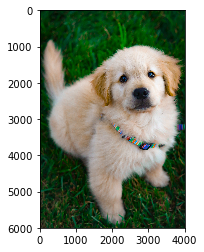

In [152]:
#Plotting the image
plt.imshow(picArray)

### Red Channel Filtering
By making all other channel as Zero

#### on Grey Colormap

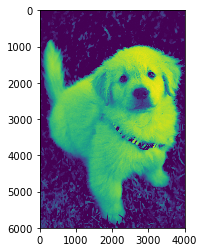

In [153]:
#Make copy of original Img
imgMod = picArray.copy()

#Get Red Channel only
imgRedOnly = imgMod[:,:,0]  #Selecting only Red Pixels
plt.imshow(imgRedOnly)      #Showing Red only Image in default ColorMap

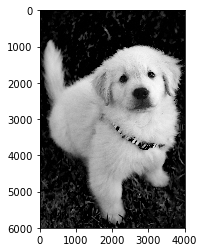

In [154]:
plt.imshow(imgRedOnly,cmap='gray') ##Showing Red only Image in GREY ColorMap

#### Overlapping Pixels

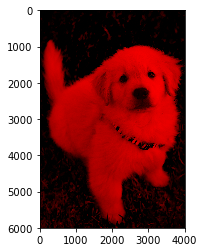

In [155]:
#Setting other channels zero
imgMod[:,:,1] = 0  #green channel
imgMod[:,:,2] = 0  #blue channel

plt.imshow(imgMod)

---
## Opening Image Files using OpenCV

### Syntax to Read Image
``` Python
cv2.imread(path, flag)
```
where flags can be
* **cv2.IMREAD_COLOR**: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
* **cv2.IMREAD_GRAYSCALE**: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
* **cv2.IMREAD_UNCHANGED**: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.


>NOTE: By default, OpenCV stores colored images in BGR(Blue Green and Red) format.

### Method to Display Image using OpenCV: - 
The steps to read and display an image in OpenCV are:

1. Read an image using `imread()` function.

2. Create a GUI window and display image using `imshow()` function.

3. Use function `waitkey(0`) to hold the image window on the screen by the specified number of seconds, 0 means till the user closes it, it will hold GUI window on the screen.

4. Delete image window from the memory after displaying using `destroyAllWindows()` function.

#### Example 1: Opening Image

In [156]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

path = "../res/puppy.jpg"

img = cv2.imread(path)
print('Image Type: ',type(img))
print('Image shape: ',img.shape)



Image Type:  <class 'numpy.ndarray'>
Image shape:  (6000, 4000, 3)



---
**Note: See the difference in colors of images read by `cv2` and `matplotlib` library. Because cv2 uses BGR color format and matplotlib uses RGB color format**.

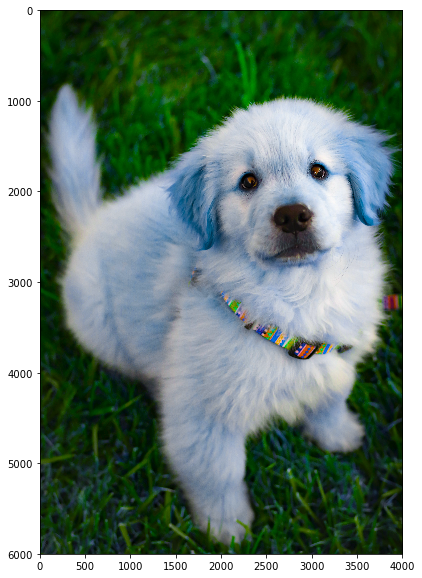

In [157]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(img)

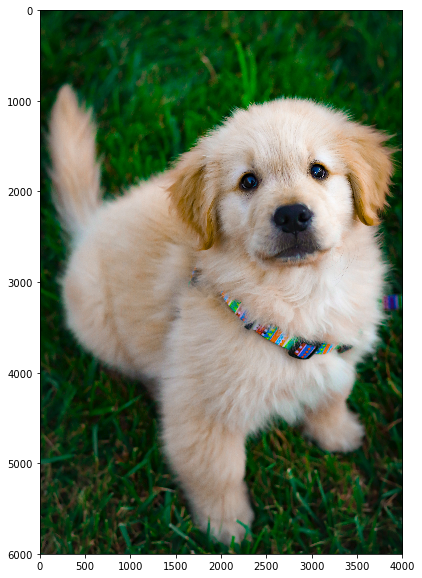

In [158]:
# COnverting BGR(OpenCV) to RGB (Matplotlib)
fix_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

#### Example 2 - Opening in grayscale mode

Using 0 in `cv2.imread(path, 0)` to read image in grayscale mode

In [159]:
grey_img = cv2.imread(path, 0)

#Shape doesn't have channel becuase its gray image
grey_img.shape 

(6000, 4000)

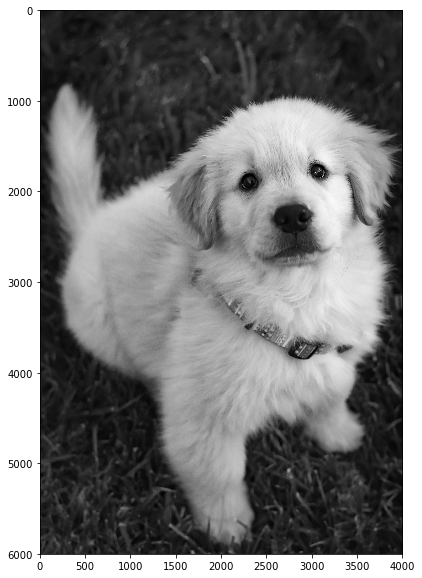

In [160]:
#using gray color map
plt.imshow(grey_img, cmap = 'gray')

#### Example 3 - `cv2.imshow()` method to display an image in a window

**Syntax:** To show the image in new windows
>``` Python
cv2.imshow(window_name, image)
```

In [161]:
## COMMENTED BECAUSE THIS CRASHES JUPYTER NOTEBOOK

#cv2.imshow("This is Gray Image",fix_img)

## Saving the Image using OpenCV

**Syntax:** used to save an image to any storage device
``` Python
cv2.imwrite(filename, image)
```

In [162]:
# Returns True if saved Successfully
cv2.imwrite("../res/gray_puppy.jpg",grey_img)

True

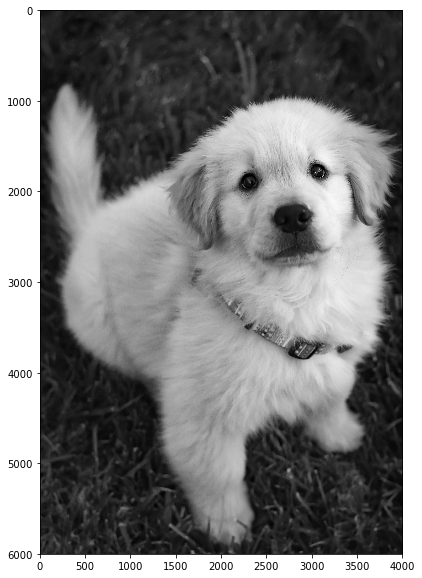

In [163]:
# To Open Image using Command Line
!"../res/gray_puppy.jpg"

# Showing Image inline
plt.imshow(cv2.imread("../res/gray_puppy.jpg"))

---
## Resize Image using OpenCV
Image resizing refers to the scaling of images.  

**Choice of Interpolation Method for Resizing –**

* `cv2.INTER_AREA` : This is used when we need to shrink an image.
* `cv2.INTER_CUBIC` : This is slow but more efficient.
* `cv2.INTER_LINEAR` : This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.


>NOTE: One thing to keep in mind while using the `cv2.resize()` function is that the tuple passed for determining the size of the new image ((1050, 1610) in this case) follows the order **(width, height)** unlike as expected (height, width).

---
#### Example 1 - Basic Resizing

In [164]:
# Getting shape of image
fix_img.shape

(6000, 4000, 3)

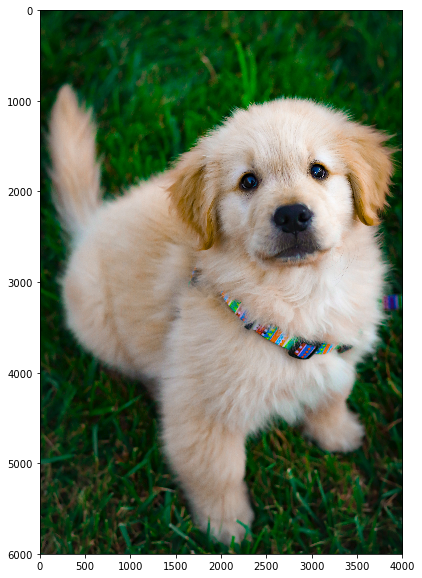

In [165]:
plt.imshow(fix_img)

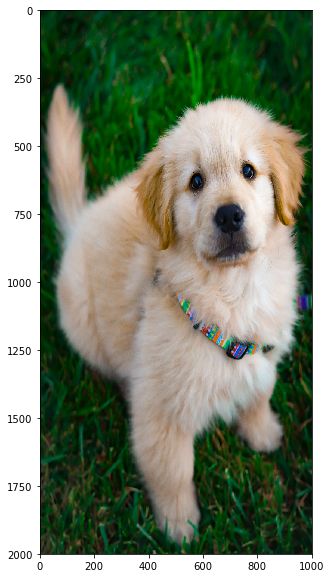

In [166]:
width, height=1000,2000

#Resizes Across all Channel
img_resized = cv2.resize(fix_img, (width,height))
plt.imshow(img_resized)

#### Example 2 -  Resizing using ratio

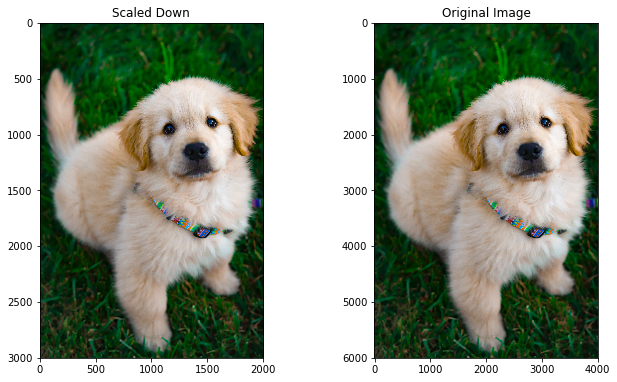

In [167]:
w_ratio = 0.5
h_ratio = 0.5

new_img = cv2.resize(fix_img, (0,0),fix_img, w_ratio, h_ratio)

plt.subplot(1, 2, 1)
plt.imshow(new_img)
plt.title("Scaled Down")
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.imshow(fix_img)
plt.title("Original Image")
plt.show()

#### Example 2 -  Resizing Multiple Images

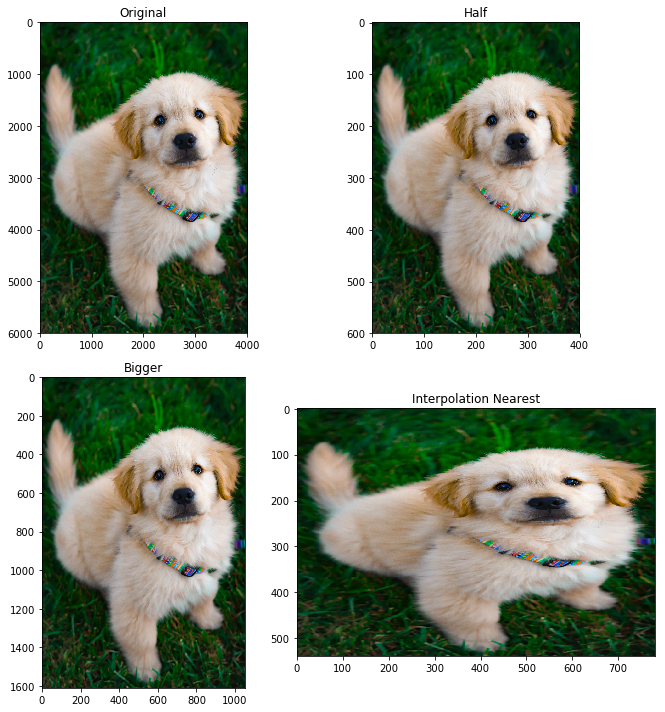

In [168]:
half = cv2.resize(fix_img, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(fix_img, (1050, 1610))
 
stretch_near = cv2.resize(fix_img, (780, 540),
               interpolation = cv2.INTER_NEAREST)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[fix_img, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    # plt.tight_layout() automatically maintains the proper space between subplots.
    plt.tight_layout()        
    plt.imshow(images[i])

plt.show()

---
## Flipping Image using OpenCV

`cv2.flip()` method is used to flip a 2D array.

**Syntax:**   
```Python
cv2.flip(src, flipCode, [dst] )
```
* **`src`**: Input array.  
* **`dst`**: Output array of the same size and type as src.
* **`flip code:`**
    * 0 means flipping around the x-axis 
    * +ve means flipping around the x-axis  
    * -ve means flipping about both axis

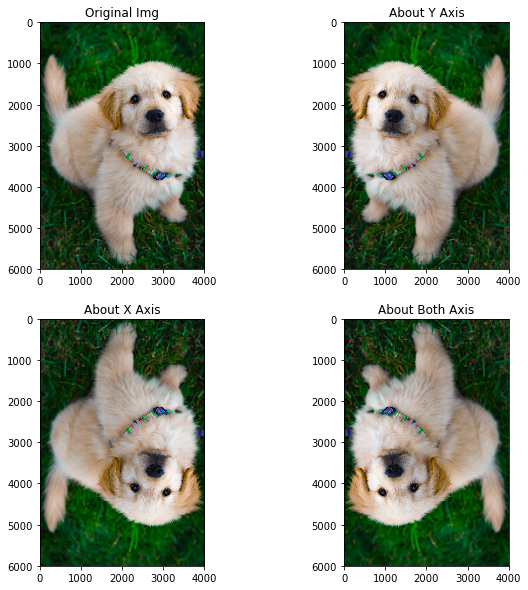

In [169]:
x_flip = cv2.flip(fix_img, 0)
y_flip = cv2.flip(fix_img, 1)
both_flip = cv2.flip(fix_img, -1)

#SETS DEFAULT WIDTH AND HEIGHT FOR JUPYTER NOTEBOOK
plt.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2, 2, 1)
plt.imshow(fix_img)
plt.title("Original Img")

plt.subplot(2, 2, 2)
plt.imshow(y_flip)
plt.title("About Y Axis")

plt.subplot(2, 2, 3)
plt.imshow(x_flip)
plt.title("About X Axis")


plt.subplot(2, 2, 4)
plt.imshow(both_flip)
plt.title("About Both Axis")

plt.show()